# Examinando una Ecuación Diferencial No Lineal

Considera la siguiente ecuación diferencial no lineal homogénea de orden 1:

$$\frac{dx}{dt} = x(b - x^2); x(0) = x_{0}$$  

* En clase hicimos el análisis de estabilidad y encontramos el potencial. Repite los pasos:  
a) Encuentra puntos fijos (recuerda que el signo de b era crucial)  
b) Evalúa su estabilidad  
c) Dibuja la evolución de trayectoria e identifica cuencas  
d) Calcula el potencial y dibújalo  

Un resultado muy importante fue el siguiente diagrama de bifurcación.

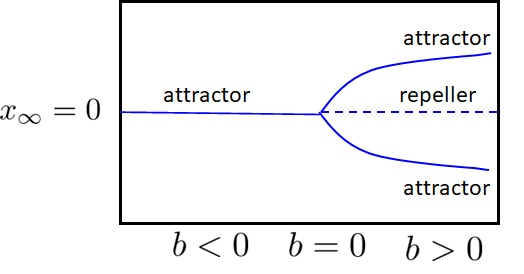

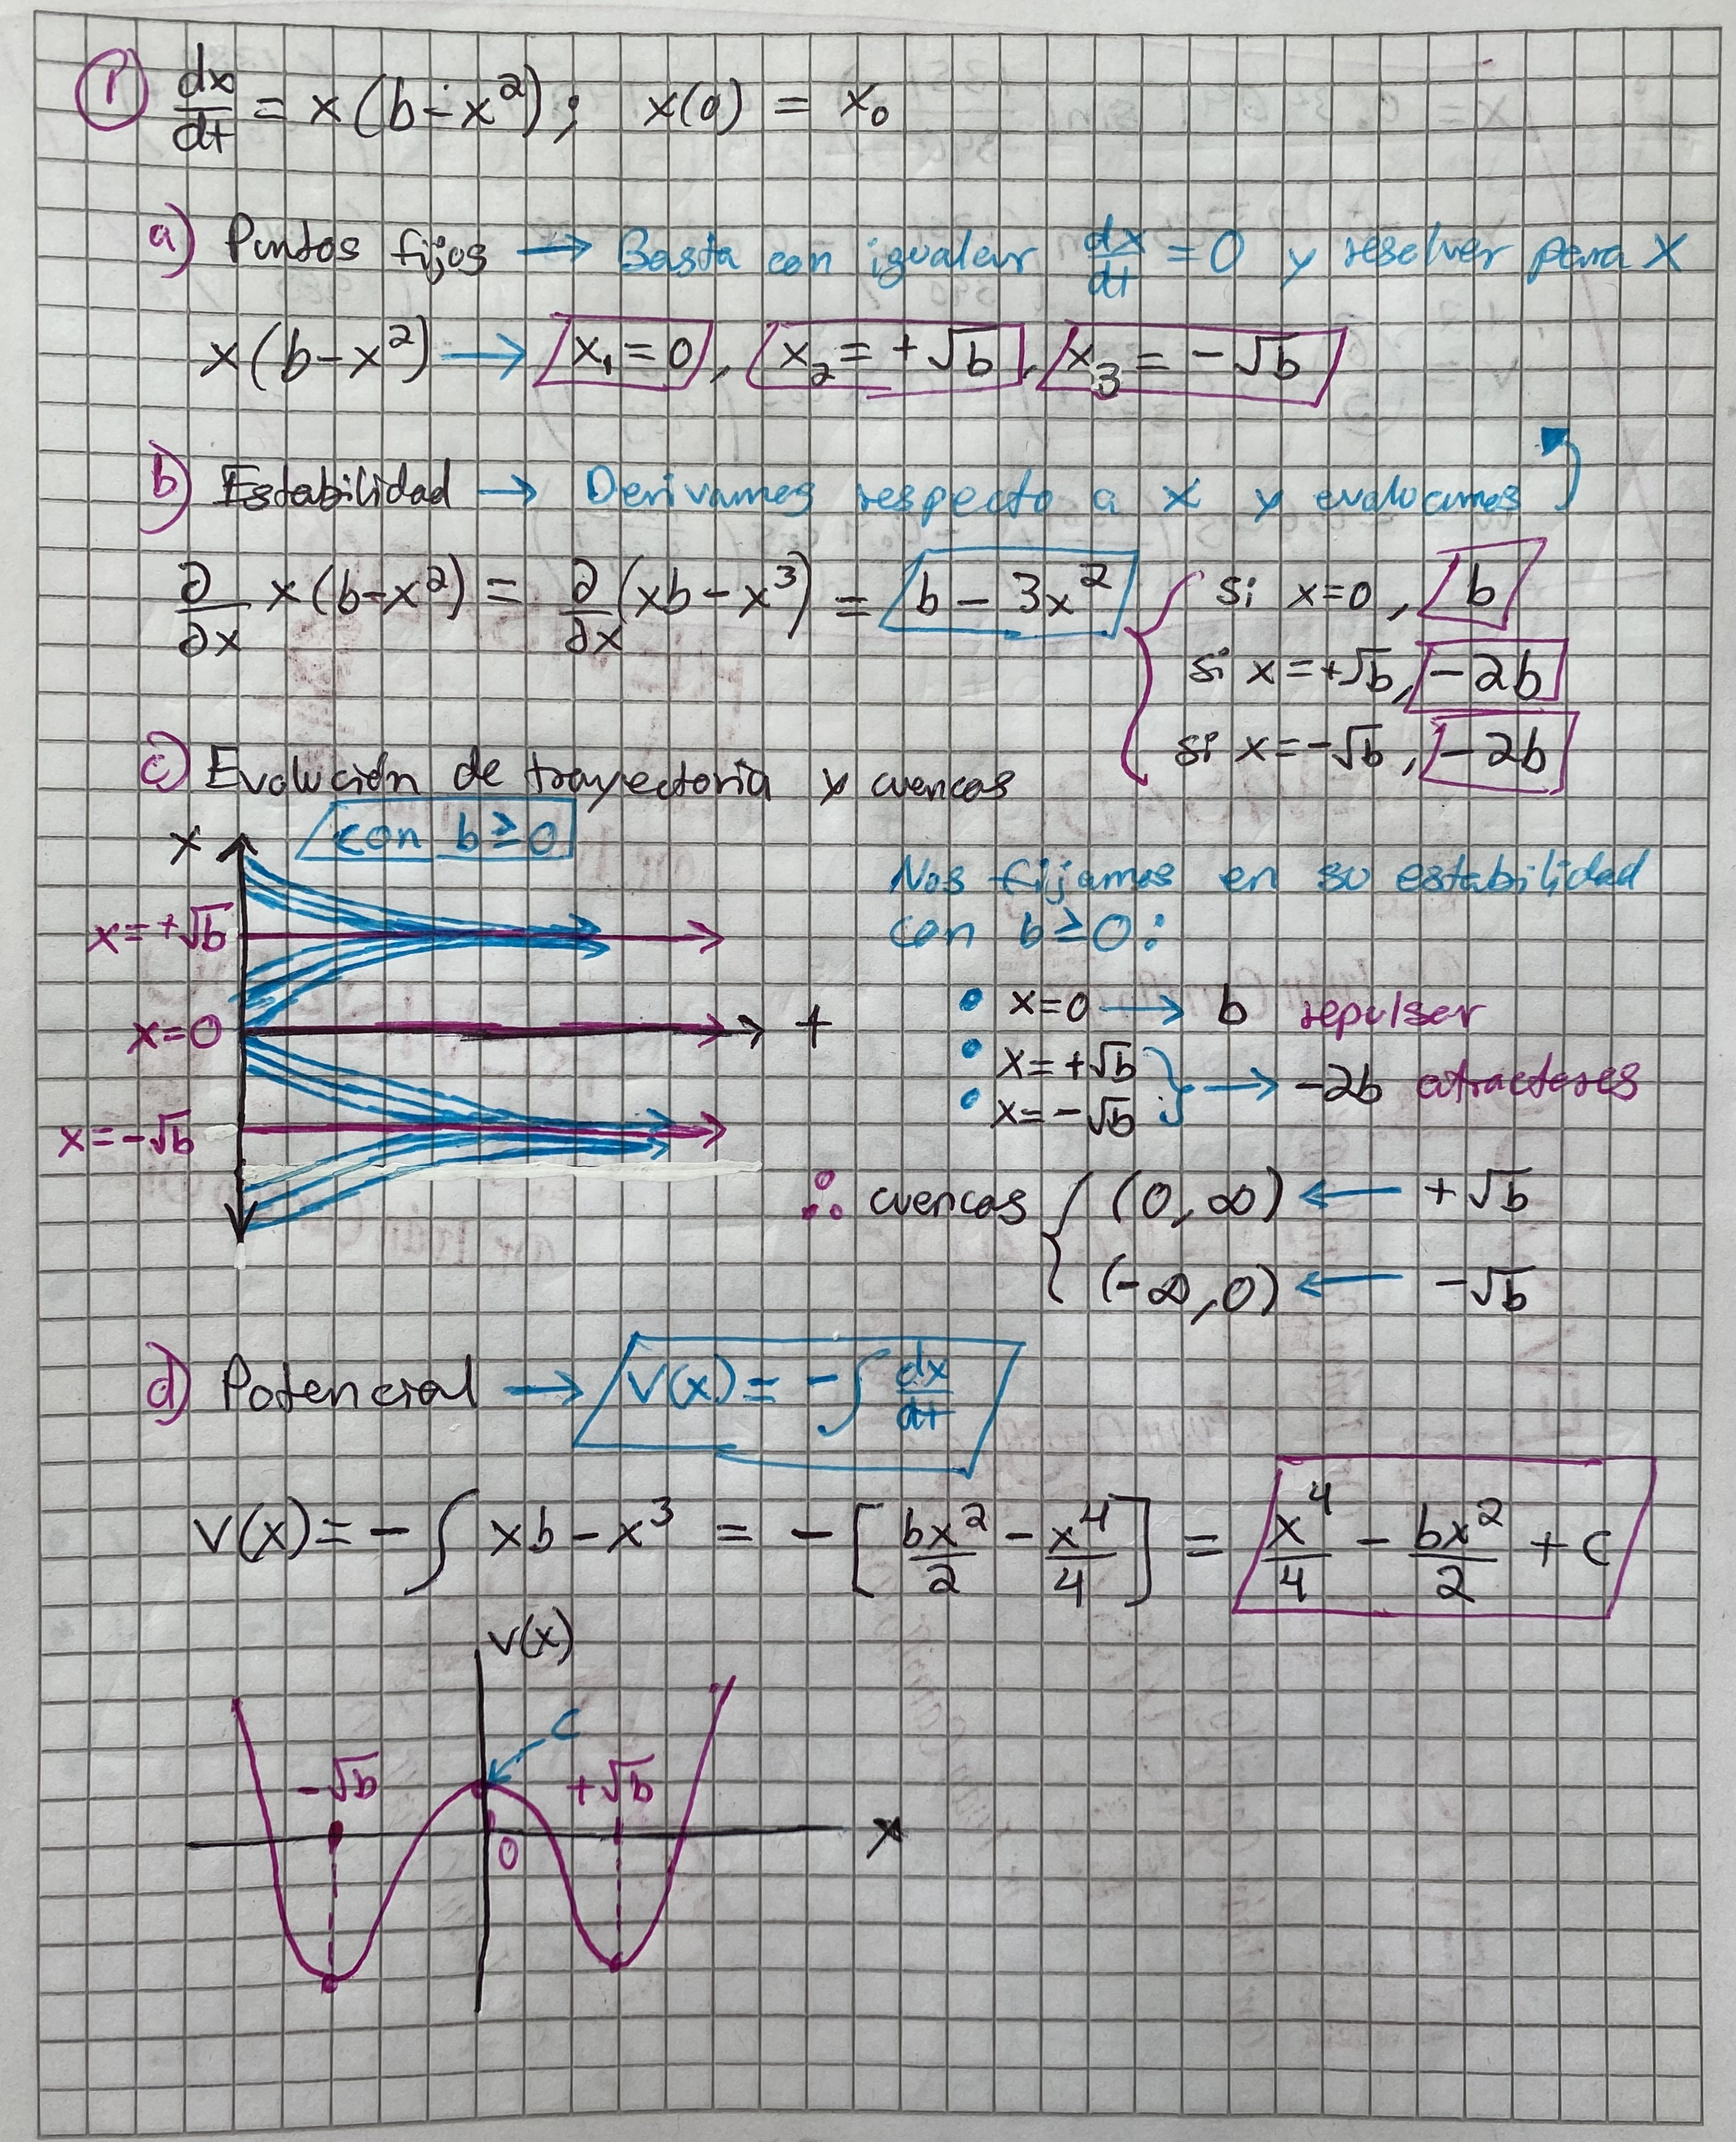

In [21]:
from IPython.display import display, Image
display(Image(filename="Imagen1.jpg"))
display(Image(filename="Ejercicio1.jpeg", width=600))

<br>

* Resolvamos la ecuación explícitamente. Esta es una ecuación de Bernoulli, asi que un sencillo cambio de variable te permitirá encontrar la solución.  

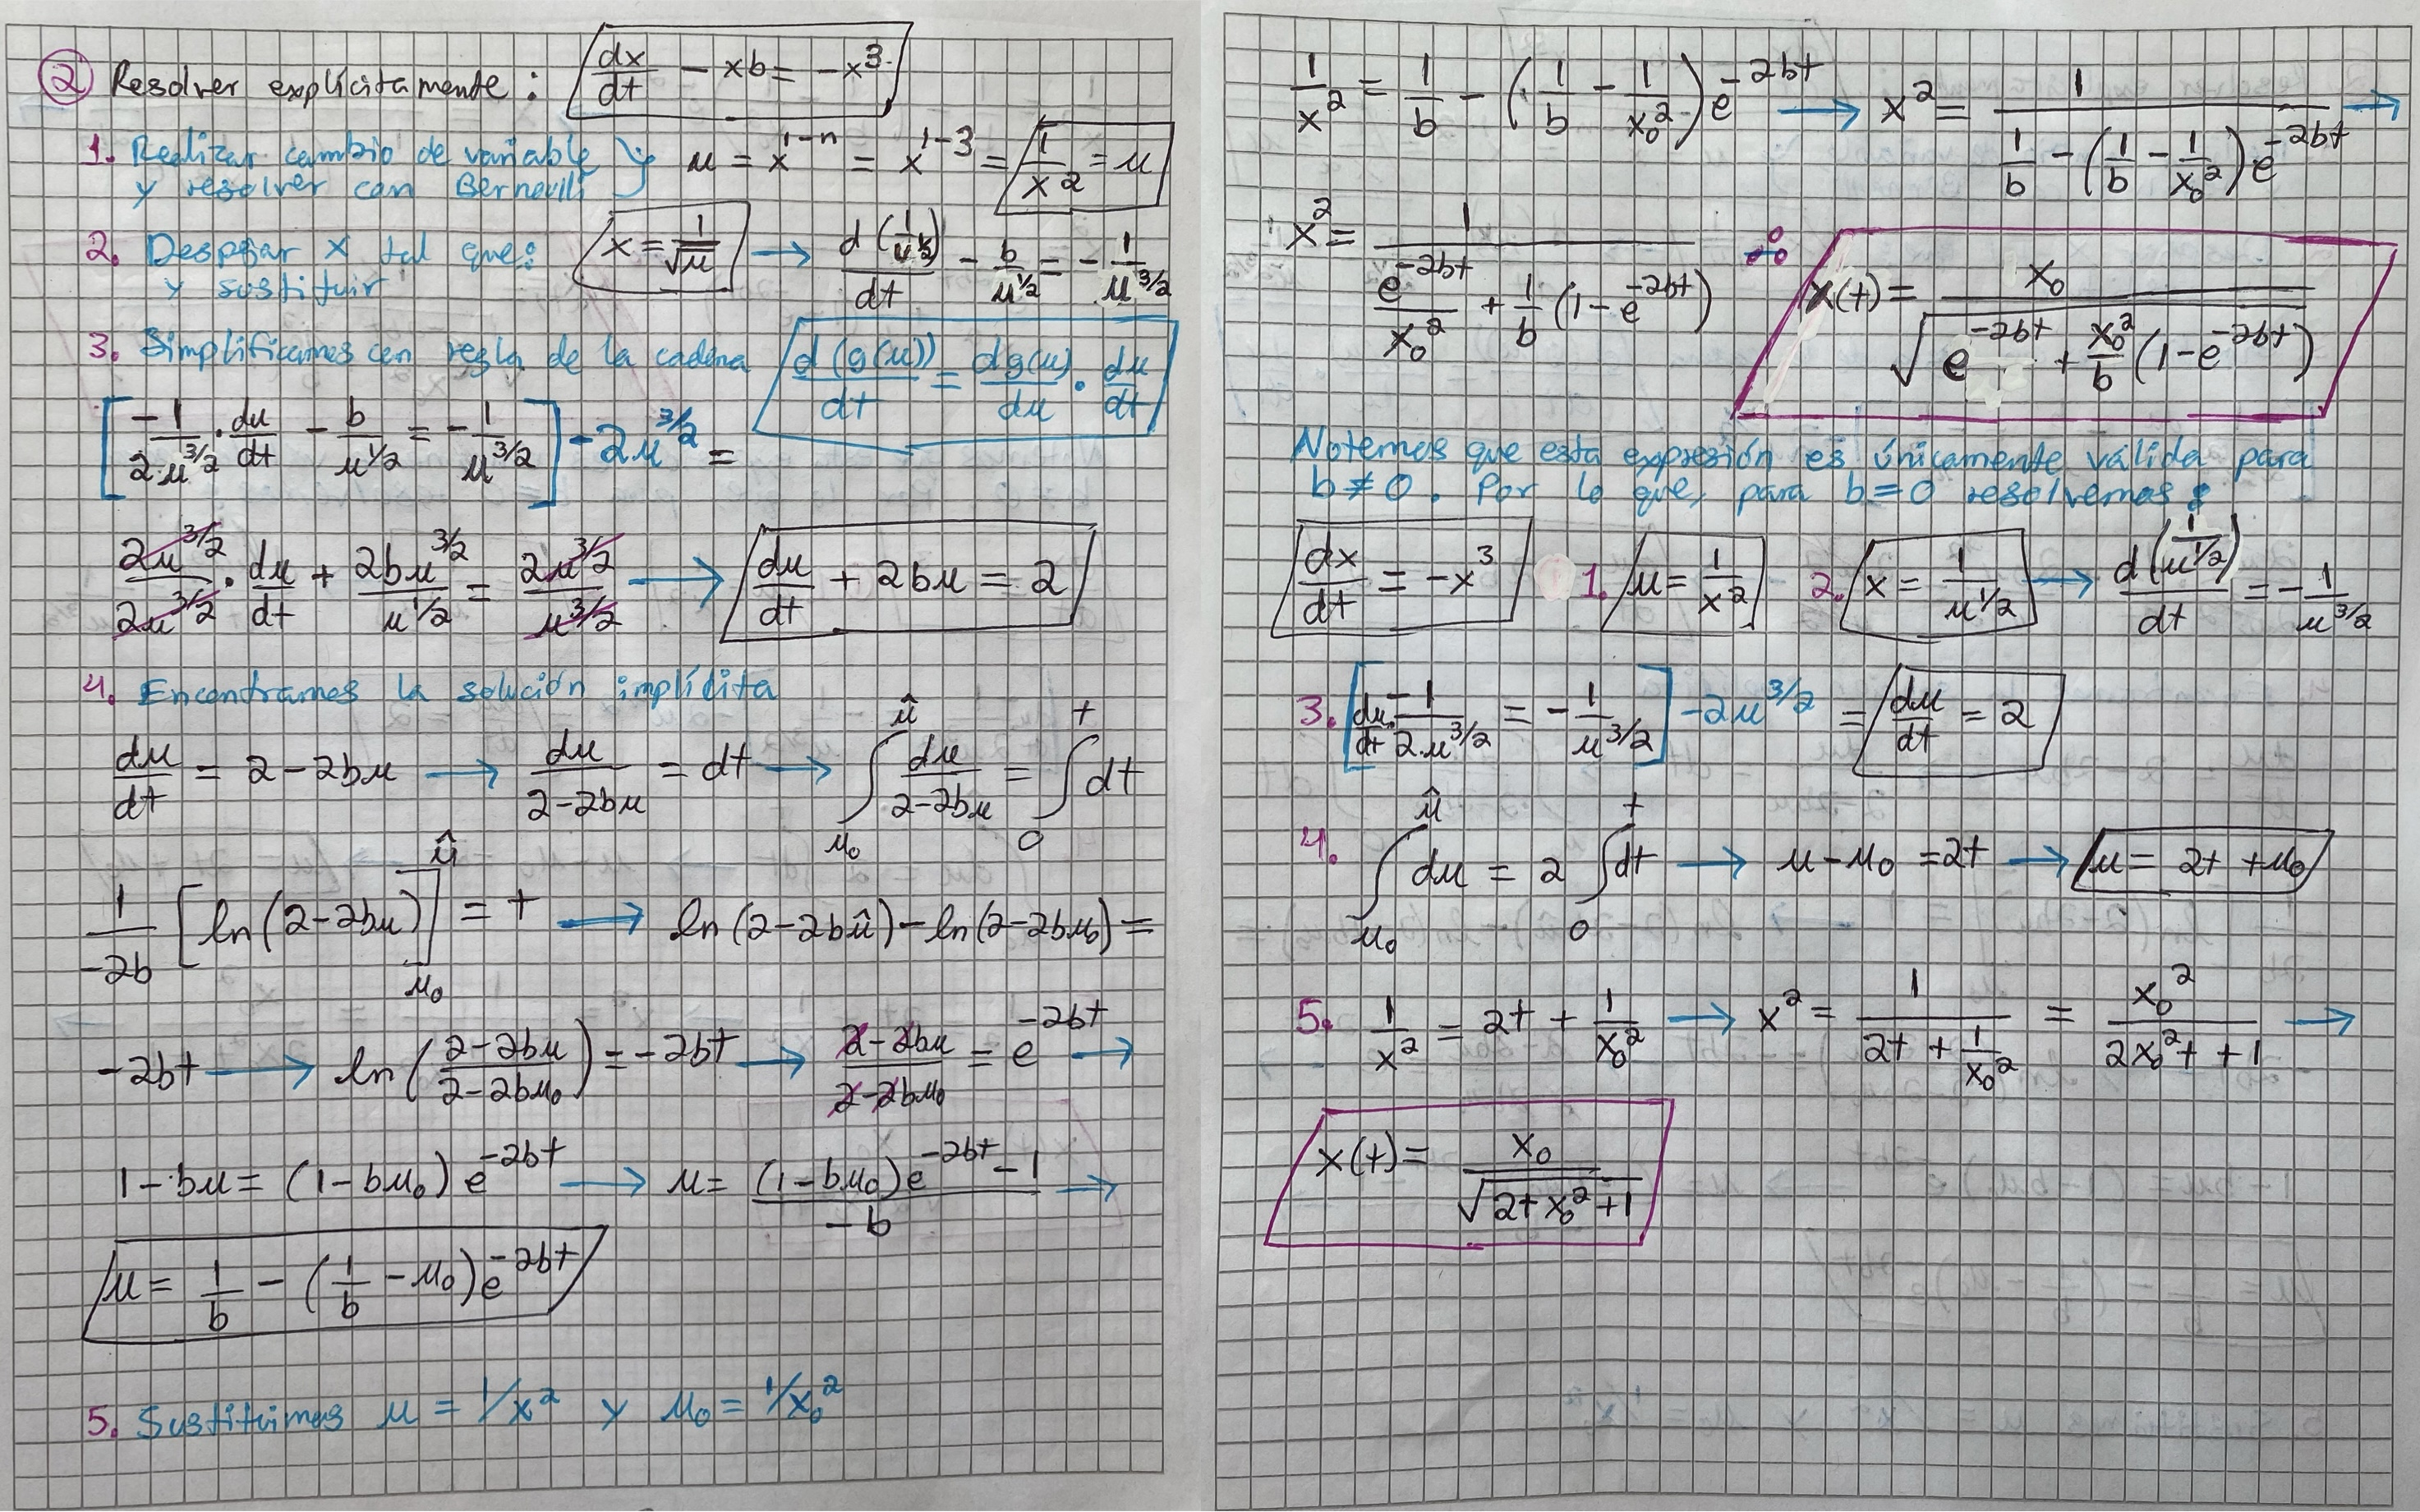

In [22]:
display(Image(filename="Ejercicio2.jpg", width=1200))

<br> 
  
* Ya que tienes la solución vamos a graficarla y explorar comportamientos.  
a) Variemos b.  
b) Para cada valor b, produce una gráfica con la evolución a partir de diferentes condiciones iniciales.  
c) Grafica las funciones de potencial para los distintos valores de b que escogiste. Puedes escoger la constante de integración C=0.

In [23]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.lines as mlines

# Función que devuelve la solución de la ecuación diferencial para b ≠ 0
def solution_b(t, x0, b):
    return x0 / np.sqrt(np.exp(-2*b*t) + (x0**2 / b) * (1 - np.exp(-2*b*t)))

# Función que devuelve la solución de la ecuación diferencial para b = 0
def solution(t, x0):
    return x0 / np.sqrt(2 * t * (x0**2) + 1)

# Función para calcular el potencial
def potential(x, b):
    return (x**4 / 4) - (b * x**2 / 2)

# Definir parámetros
b_values = [-2, -1.2, 0, 1.2, 2]
x0_values = np.arange(-4, 4.1, 0.1)
t_values = np.linspace(0, 5, 500)

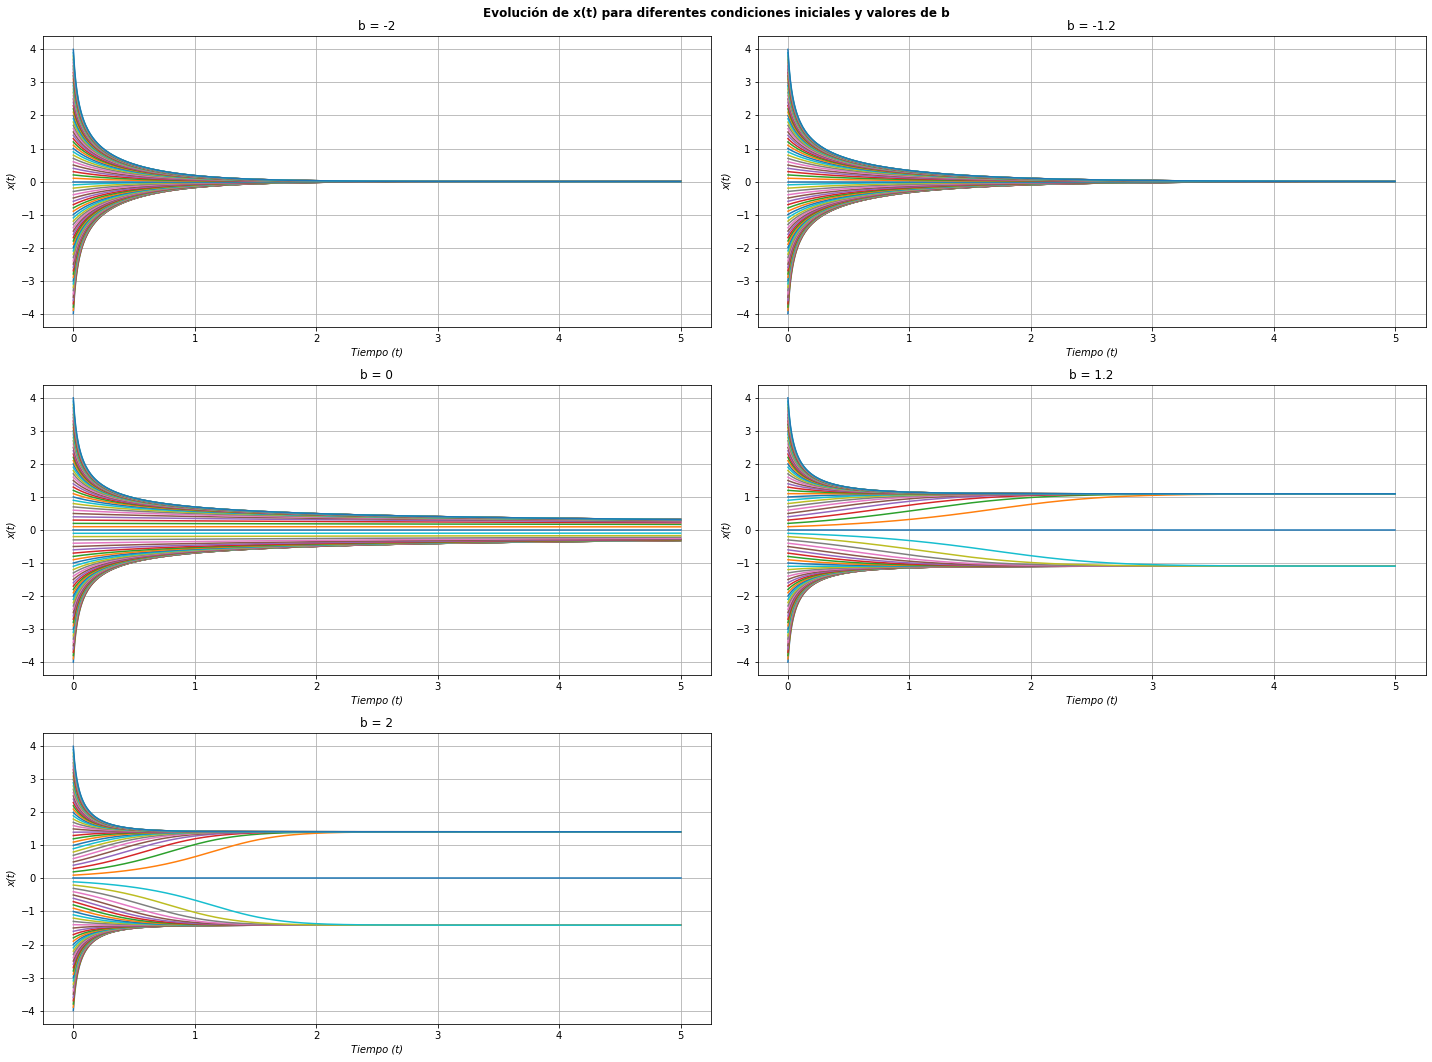

In [24]:
# Graficar evolución para diferentes condiciones iniciales y valores de b
plt.figure(figsize=(20, 15))

for i, b in enumerate(b_values):
    plt.subplot(3, 2, i + 1)
    plt.title(f'b = {b}')
    plt.xlabel('Tiempo (t)', fontstyle='italic')
    plt.ylabel('x(t)', fontstyle='italic')
    
    # Resolvemos para x con cada condicion inicial x_0 y graficamos
    for x0 in x0_values:
        if b != 0:
            x_values = solution_b(t_values, x0, b)
        else:
            x_values = solution(t_values, x0)
        plt.plot(t_values, x_values)
        plt.grid(True)

plt.suptitle('Evolución de x(t) para diferentes condiciones iniciales y valores de b', fontweight='bold')
plt.tight_layout()
plt.show()

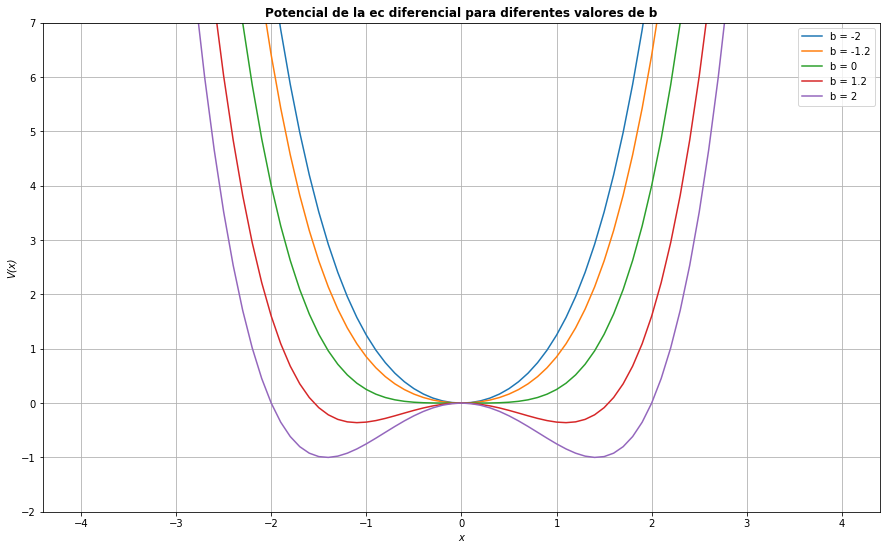

In [25]:
# Graficar funcion de potencial para diferentes valores de b
plt.figure(figsize=(15, 9))

# Resolvemos para V con cada valor de b y graficamos
for b in b_values:
    V_values = potential(x0_values, b)
    plt.plot(x0_values, V_values, label=f'b = {b}')

plt.title('Potencial de la ec diferencial para diferentes valores de b', fontweight='bold')
plt.xlabel('x', fontstyle='italic')
plt.ylabel('V(x)', fontstyle='italic')
plt.ylim(-2, 7) # Limitar el eje y de -2 a 7
plt.legend()
plt.grid(True)
plt.show()

* Reto opcional: Produce 2 gifs, uno que muestre como las trayectorias de (b) y otro que muestre los potenciales de (c) cambiando cuando el parámetro b varía

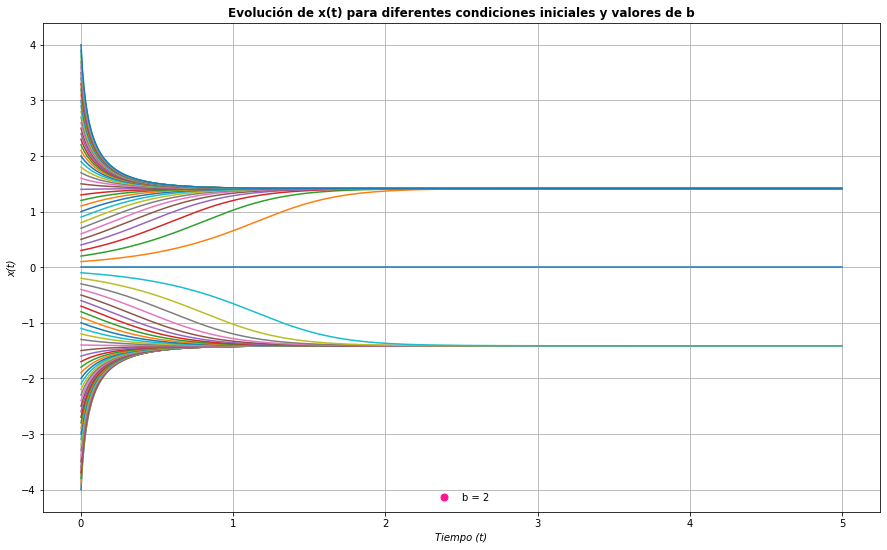

In [26]:
# Configuración para animación de evolución de x(t)
fig1, ax1 = plt.subplots(figsize=(15, 9))

# Actualizar la animación para cada instante (frame)
def update1(frame):
    ax1.clear()
    ax1.set_title('Evolución de x(t) para diferentes condiciones iniciales y valores de b', fontweight='bold')
    ax1.set_xlabel('Tiempo (t)', fontstyle='italic')
    ax1.set_ylabel('x(t)', fontstyle='italic')
    ax1.grid(True)
    
    # Resolvemos para x con cada condicion inicial x_0
    for x0 in x0_values:
        if b_values[frame] != 0:
            x_values = solution_b(t_values, x0, b_values[frame])
        else:
            x_values = solution(t_values, x0)
        ax1.plot(t_values, x_values, label=f'b = {b_values[frame]}')
        
    # Colocar la leyenda personalizada
    pink_dot = mlines.Line2D([], [], color='deeppink', marker='o', linestyle='None', markersize=7, label=f'b = {b_values[frame]}')
    ax1.legend(handles = [pink_dot], frameon=False, loc='lower center')
    
# Guardar la animación en un archivo gif usando Pillow como escritor
ani1 = FuncAnimation(fig1, update1, frames=len(b_values), interval=1000, repeat=True)
ani1.save('evolucion_x.gif', writer='pillow')

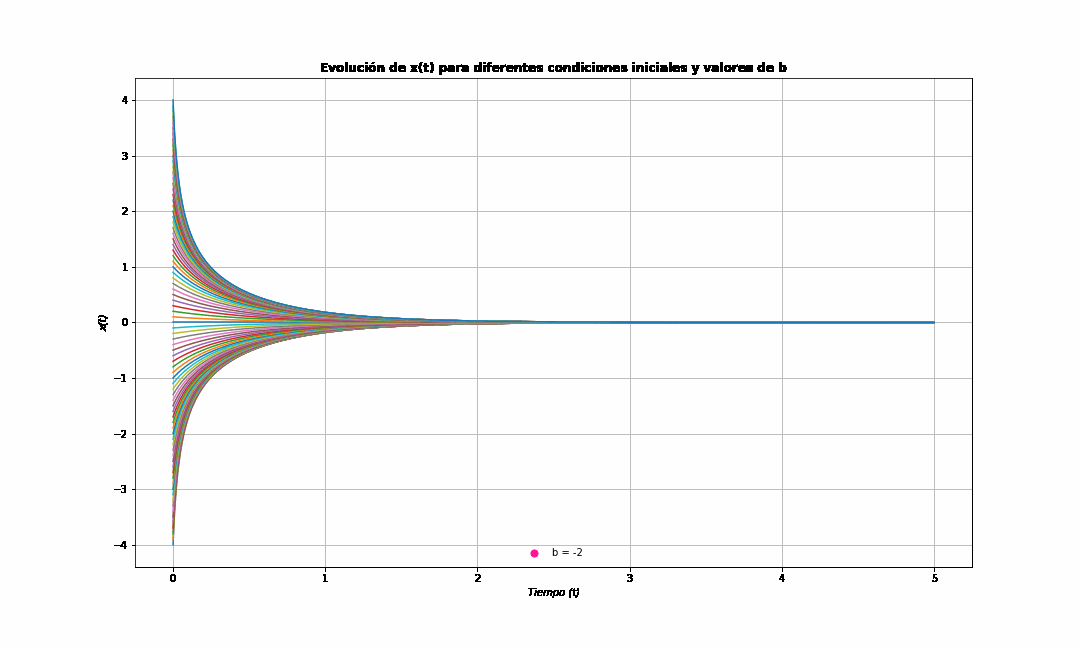

In [27]:
display(Image(filename="evolucion_x.gif"))


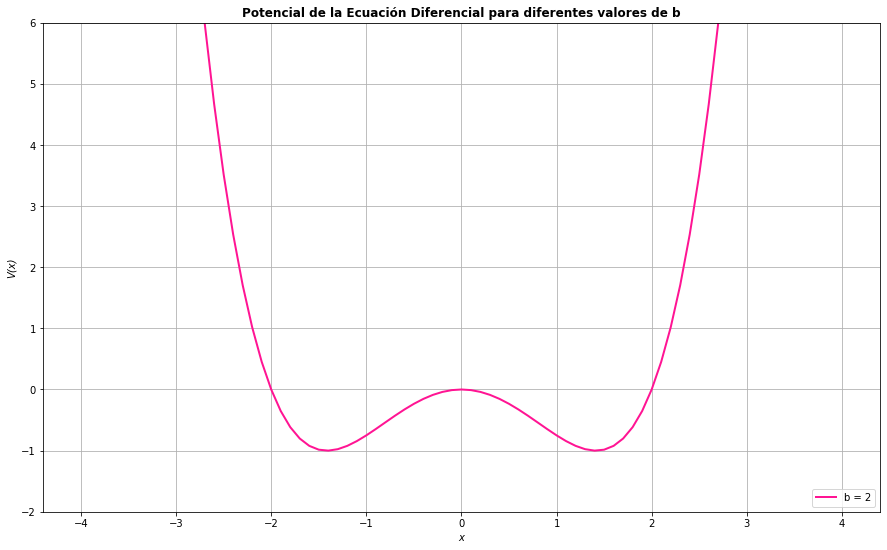

In [28]:
# Configuración para animación del potencial
fig2, ax2 = plt.subplots(figsize=(15, 9))

# Actualizar la animación para cada instante (frame)
def update2(frame):
    V_values = potential(x0_values, b_values[frame])
    ax2.clear()
    ax2.set_title('Potencial de la Ecuación Diferencial para diferentes valores de b', fontweight='bold')
    ax2.set_xlabel('x', fontstyle='italic')
    ax2.set_ylabel('V(x)', fontstyle='italic')
    ax2.plot(x0_values, V_values, label=f'b = {b_values[frame]}',color='deeppink', linewidth=2)
    ax2.legend(loc='lower right')
    ax2.set_ylim(-2, 6) # Limitar el eje y de -2 a 6
    ax2.grid(True)

# Guardar la animación en un archivo gif usando Pillow como escritor
ani2 = FuncAnimation(fig2, update2, frames=len(b_values), interval=1000, repeat=True)
ani2.save('potencial_v.gif', writer='pillow')

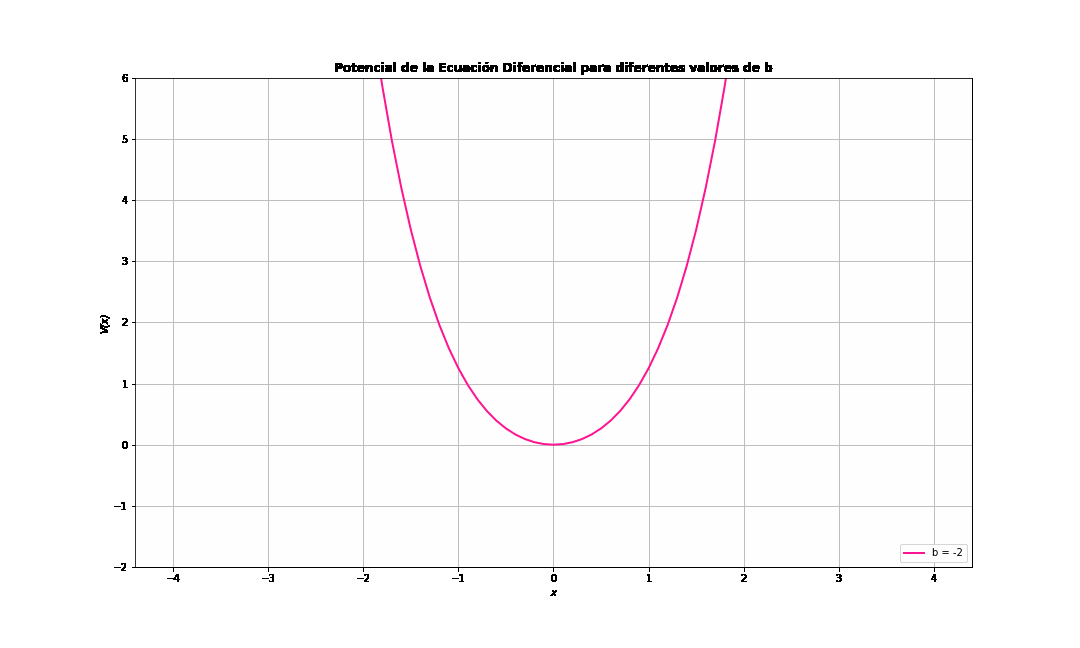

In [29]:
display(Image(filename="potencial_v.gif"))

<br> 
  
*  En la vida real, muchas veces no sabemos con precisión las condiciones iniciales de nuestras ecuaciones. Para cada condición inicial que definiste en (b), y un valor b = 2, considera 2 valores iniciales nuevos: $x_0 ± ϵ$ (una perturbación pequeña, por ejemplo ϵ = 0.05). La distancia inicial entre las dos condiciones iniciales perturbadas es 2ϵ. Calcula las trayectorias a partir de estos puntos y encuentra los dos valores correspondientes en t = 5. Calcula el cociente: $\frac{Δ(t=5)}{Δ(t=0)}$. Repite esto para todas las condiciones iniciales de (b) y haz una gráfica. ¿Cómo se comporta la gráfica? ¿En que 'región' de los valores iniciales la precisión es muy importante?

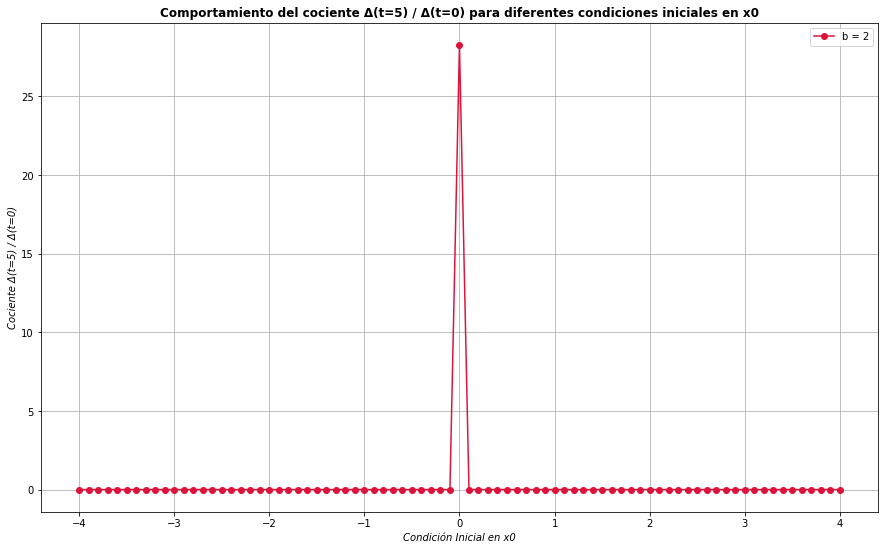

In [30]:
# Definir parámetros
b = 2
epsilon = 0.05
t_values = np.array([0, 5]) # únicamente nos interesa el tiempo 0 y 5

# Lista que almacena el cociente Δ(t=5) / Δ(t=0) para cada condición inicial en x0
ratios = []

for x0 in x0_values:
    perturbed_x0_positive = x0 + epsilon
    perturbed_x0_negative = x0 - epsilon
    
    # Calcular las trayectorias para las condiciones iniciales perturbadas
    trajectory_perturbed_positive = solution_b(t_values, perturbed_x0_positive, b)
    trajectory_perturbed_negative = solution_b(t_values, perturbed_x0_negative, b)
    
    # Calcular Δ en t=5 y Δ en t=0
    delta_t5 = np.abs(trajectory_perturbed_positive[-1] - trajectory_perturbed_negative[-1])
    delta_t0 = np.abs(trajectory_perturbed_positive[0] - trajectory_perturbed_negative[0]) # Siempre vale 2*epsilon
    
    # Calcular el cociente Δ(t=5) / Δ(t=0)
    ratio = delta_t5 / delta_t0
    ratios.append(ratio)

# Graficar el comportamiento de Δ(t=5) / Δ(t=0) para cada condición inicial en x0
plt.figure(figsize=(15, 9))
plt.plot(x0_values, ratios, marker='o', color='crimson', label="b = 2")
plt.title('Comportamiento del cociente Δ(t=5) / Δ(t=0) para diferentes condiciones iniciales en x0', fontweight='bold')
plt.xlabel('Condición Inicial en x0', fontstyle='italic')
plt.ylabel('Cociente Δ(t=5) / Δ(t=0)', fontstyle='italic')
plt.legend()
plt.grid(True)
plt.show()

1. **Comportamiento de la gráfica:**
   - El cociente $\frac{Δ(t=5)}{Δ(t=0)}$ es bastante pequeño para la mayoría de las condiciones iniciales en $x_{0}$, excepto para $x_{0} = 0$.  
   - Para $x_{0} = 0$, $\frac{Δ(t=5)}{Δ(t=0)} ≈ 28.284$, lo que indica que, pequeñas variaciones en las condiciones iniciales alrededor de $x_{0} = 0$ conducen a diferencias más notables en las trayectorias a lo largo del tiempo.  

2. **Región de importancia en los valores iniciales:**
   - La precisión es más crítica alrededor de la condición inicial $x_{0} = 0$. En esta región, las perturbaciones iniciales tienen un impacto más significativo en la evolución del sistema a lo largo del tiempo. En otras palabras, las trayectorias son más sensibles a pequeñas perturbaciones al rededor de este punto. 
   - Para otras condiciones iniciales, la pequeña perturbación (ε=0.05) no tiene un impacto significativo en la relación $\frac{Δ(t=5)}{Δ(t=0)}$.  